<a href="https://colab.research.google.com/github/zhafarulmaahiy/pembelajaran-machine-Muhammad_zhafarul_Maahiy-2211533009/blob/main/PengantarAI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# packages untuk analysis
import pandas as pd
import numpy as np
from sklearn import svm

In [132]:
# packages untuk visuals
import matplotlib.pyplot as pt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [133]:
# packages pickle
import pickle

In [134]:
recipes = pd.read_csv("/content/drive/My Drive/MachineLearning/recipes_muffins_cupcakes.csv")
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


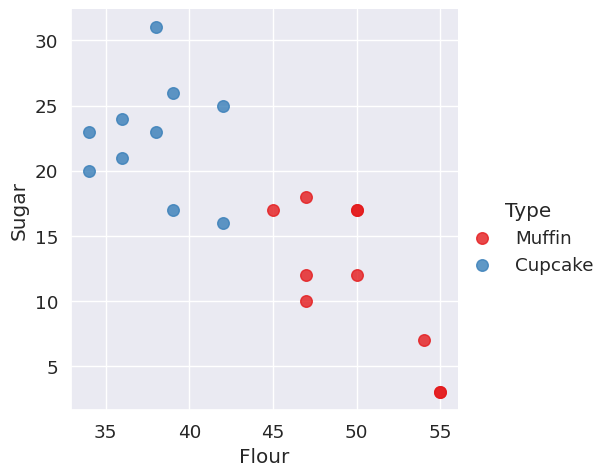

In [135]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70});

In [136]:
# menginputkan model

ingredients = recipes[['Flour','Sugar']].to_numpy()
type_label = np.where(recipes['Type']=='Muffin',0,1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [137]:
# masukkan svm
model =svm .SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [138]:
# dapatkan pemisah dari hyperplane
w =model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]/ w[1])

In [139]:
# masukkan plot paralel ke hyperplane pemisah yang melewati support vektor
b = model.support_vectors_[0]
yy_down = a*xx+(b[1]-a*b[0])
b = model.support_vectors_[-1]
yy_up = a * xx +(b[1]- a *b[0])

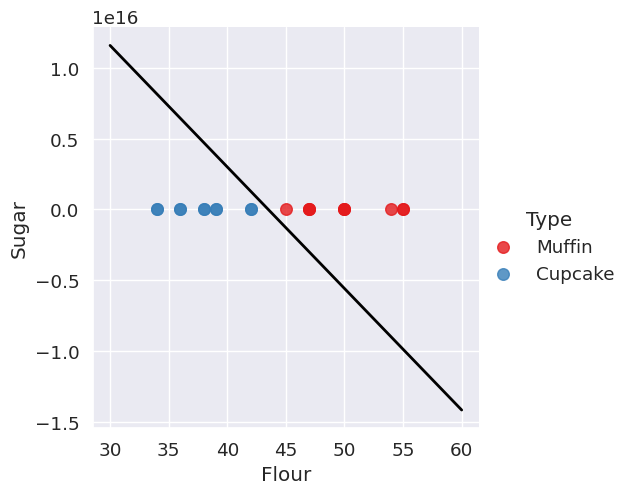

In [140]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
pt.plot(xx, yy, linewidth=2,color="Black")

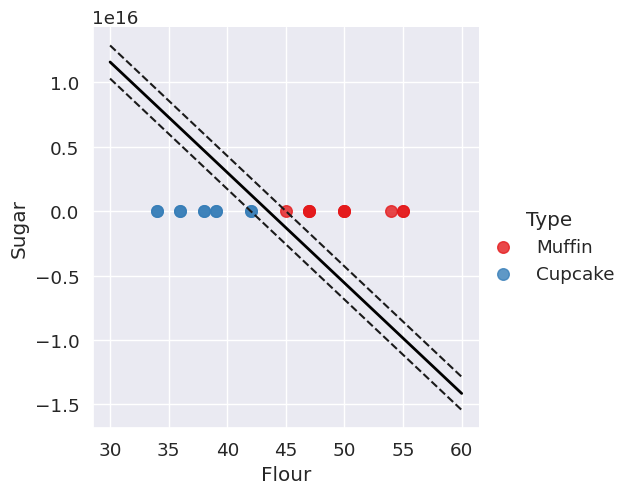

In [141]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
pt.plot(xx, yy, linewidth=2,color="black")
pt.plot(xx, yy_down, 'k--')
pt.plot(xx, yy_up,'k--')
pt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=80, facecolors='none');

In [142]:
#buat fungsi untuk memprediksi kapan resep itu apakah itu muffin atau cupcakke

def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour, sugar]]))==0:
      print('You\'re looking at a muffin recipe!')
    else :
      print('You\'re looking at a cupcake recipe!')

In [143]:
# prediksi jika menggunakan bahan : 50 tepung dan 20 gula
muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


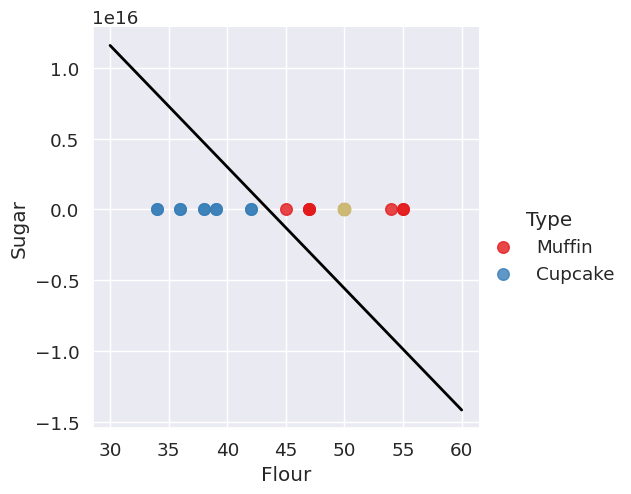

In [144]:
# tampilkan titik plot untuk melihat secara cvisula di mana titik itu berada
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
pt.plot(xx, yy, linewidth=2, color='black')
pt.plot(50, 60, 'yo', markersize='9');